In [7]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

from math import sqrt
from scipy.stats import norm
import numpy as np
from IPython.display import display, clear_output
import numpy
import matplotlib.pyplot as plt


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [8]:
import numpy

In [9]:
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

x[:, 0]

array([0., 0.])

In [10]:
x.shape

(2, 501)

In [11]:
f = brownian(x[:,0], N, dt, delta, out=x[:,1:])
f.shape

(2, 500)

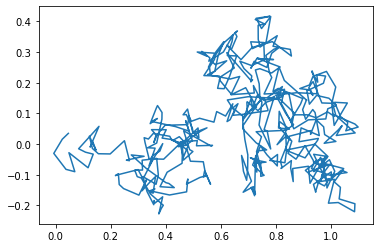

In [12]:
plt.plot(f[0,:],f[1,:])

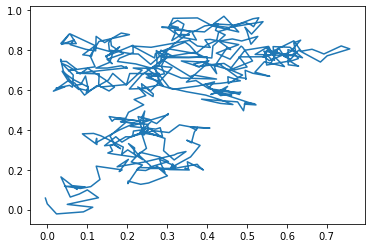

In [13]:
theta = 45
c, s = np.cos(theta), np.sin(theta)
rot45 = np.array(((c, -s), (s, c)))

rottraj = rot45@f

plt.plot(rottraj[0,:],rottraj[1,:])

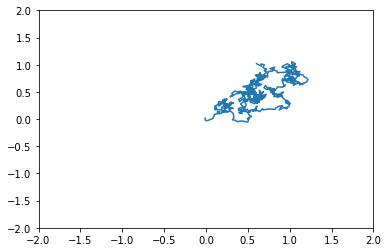

In [14]:
f = brownian(x[:,0], N, dt, delta, out=x[:,1:])

from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []
for i in range(f.shape[1]):

    new_y = f[1,:i]
    new_x = f[0,:i]

    if i == 0:
        ax.plot(new_x,new_y,'go')
    elif i==f.shape[1]-1:
        ax.plot(new_x,new_y,'ro')


    ax.clear()

    ax.plot(new_x,new_y)
    plt.xlim((-2, 2))   # set the xlim to left, right
    plt.ylim((-2, 2)) 
    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')

    #display(fig)
    clear_output(wait=True)
    #plt.pause(0.1)



In [15]:
import imageio.v2 as imageio
with imageio.get_writer('test_axlim.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Add another water molecule

In [16]:
import random
numofmol = 2
traj = np.zeros((2,N,numofmol))

initial = numpy.random.uniform(low=-2, high=2, size=(numofmol,2))

for i in range(numofmol):
    traj[:,:,i] = brownian(initial[i,:], N, dt, delta)


In [17]:
test45 = traj[:,:,0]

theta = 45
c, s = np.cos(theta), np.sin(theta)
rot45 = np.array(((c, -s), (s, c)))

rot45.shape

(2, 2)

In [18]:
rottraj = rot45@test45


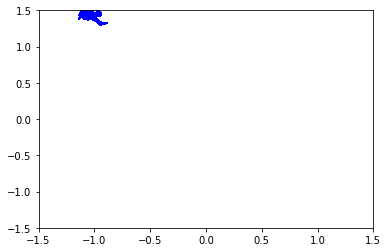

In [19]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []
for i in range(N):

    new_y = rottraj[1,:i]
    new_x = rottraj[0,:i]

        #if i == 0:
        #    ax.plot(new_x,new_y,'go')
        #elif i==f.shape[1]-1:
        #    ax.plot(new_x,new_y,'ro')

    ax.plot(new_x,new_y,'b')
    plt.xlim((-1.5, 1.5))   # set the xlim to left, right
    plt.ylim((-1.5, 1.5)) 


    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

In [20]:
import imageio.v2 as imageio
with imageio.get_writer('test_45deg.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

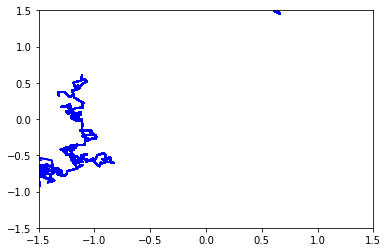

In [21]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []
for i in range(N):
    for j in range(numofmol):

        new_y = traj[1,:i,j]
        new_x = traj[0,:i,j]

        #if i == 0:
        #    ax.plot(new_x,new_y,'go')
        #elif i==f.shape[1]-1:
        #    ax.plot(new_x,new_y,'ro')

        ax.plot(new_x,new_y,'b')
        plt.xlim((-1.5, 1.5))   # set the xlim to left, right
        plt.ylim((-1.5, 1.5)) 


    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

In [22]:
import imageio.v2 as imageio
with imageio.get_writer('test_2mol.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [23]:
origtraj = np.zeros((2,N,numofmol))

for i in range(numofmol):
    origtraj[0,:,i] = traj[0,:,i] - initial[i,0]
    origtraj[1,:,i] = traj[1,:,i] - initial[i,1]

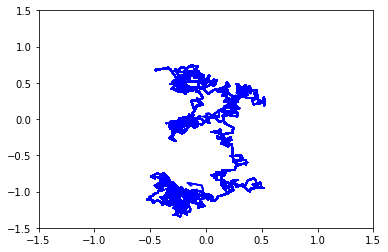

In [24]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []
for i in range(N):
    for j in range(numofmol):

        new_y = origtraj[1,:i,j]
        new_x = origtraj[0,:i,j]

        #if i == 0:
        #    ax.plot(new_x,new_y,'go')
        #elif i==f.shape[1]-1:
        #    ax.plot(new_x,new_y,'ro')

        ax.plot(new_x,new_y,'b')
        plt.xlim((-1.5, 1.5))   # set the xlim to left, right
        plt.ylim((-1.5, 1.5)) 


    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

In [25]:
import imageio.v2 as imageio
with imageio.get_writer('test_2mol_orig.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [26]:
#test = brownian(initial[0,:], N, dt, delta)
n=N
x0 = initial[0,:]

In [27]:
x0 = np.asarray(x0)

In [28]:
r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
r.shape

(2, 500)

In [29]:
r

array([[-6.60249886e-02,  4.28569292e-02,  2.27195281e-03,
         1.11887476e-02,  3.35910762e-02, -3.51286225e-02,
        -1.82982269e-02, -5.93881398e-02,  1.96492398e-02,
         8.75335606e-03,  1.11386777e-02,  1.81116205e-02,
         1.06867322e-02, -1.74154362e-02,  2.00770346e-03,
         1.56461174e-02, -2.74075733e-02, -4.70767992e-02,
        -5.42928216e-03,  2.50913252e-02, -1.52840683e-02,
        -2.94339438e-02, -2.74337986e-02, -1.94848066e-02,
         7.05409997e-04, -1.43658396e-02,  5.98442672e-02,
        -2.47818660e-02,  5.40061344e-02, -2.17244134e-02,
        -7.83660720e-03, -4.00851707e-02, -2.03820321e-02,
        -2.83325909e-02, -1.44043254e-03, -9.83153809e-03,
         4.69252993e-02,  6.39702822e-02, -3.66536173e-02,
         3.10903131e-02,  5.29839613e-02,  5.99570125e-02,
        -1.08473774e-02, -3.80086436e-02, -1.02703195e-02,
         7.98965672e-04, -3.07731736e-02,  6.19808496e-02,
        -9.95859499e-03, -2.44212550e-02, -5.97007041e-0

In [30]:
t = np.cumsum(r, axis=-1)
t.shape

(2, 500)

In [31]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [32]:
x0[0]

0.9382866895062829

In [33]:
np.squeeze(np.array(t)).shape

(2, 500)

# Final

In [34]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian_singlestep(x0, n, dt, delta, radius, theta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)
    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    coordhold = np.copy(x0)
    coordfinal = np.zeros((2,n))
    #coordfinal = []

    c, s = np.cos(theta), np.sin(theta)
    rot = np.array(((c, -s), (s, c)))


    if x0[0] < -radius:
        where=0
        for i in range(n):
            if i == 0:
                coordfinal[:,0] = x0
            #print(i)
            else:
                r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) < -radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) > -radius:
                        r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold
    elif x0[0] > radius:
        where=0
        for i in range(n):
            if i == 0:
                coordfinal[:,0] = x0
            #print(i)
            else:
                r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) > radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) < radius:
                        r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold
    else:
        where = 1
        for i in range(n):
            if i == 0:
                coordfinal[:,0] = x0
            #print(i)
            else:
                r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) > -radius and (r[0] + coordhold[0]) < radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) < -radius or (r[0] + coordhold[0]) > radius:
                        r = norm.rvs(size=(2,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold

    coordfinal = np.squeeze(np.array(coordfinal))
    # Add the initial condition.
    #coordfinal += np.expand_dims(x0, axis=-1)
    coordfinal = np.transpose(rot) @ coordfinal
    initialrot = np.transpose(rot) @ x0
    
    return coordfinal,where,initialrot

In [35]:
import random
import numpy
numofmol = 10
N = 100
radius = 0.1
theta = 45

delta = 0.4
# Total time.
T = 7
# Time step size
dt = T/N

traj = np.zeros((2,N,numofmol))
initialrot = np.zeros((numofmol,2))
where = np.zeros((numofmol))

initialinx = numpy.random.uniform(low=-radius, high=radius, size=(round(numofmol*0.6),1))
initialiny = numpy.random.uniform(low=-1.5, high=1.5, size=(round(numofmol*0.6),1))
initialincomb = np.concatenate((initialinx,initialiny),axis=1)

initialleftx = numpy.random.uniform(low=-1.5, high=-radius, size=(round(numofmol*0.2),1))
initiallefty = numpy.random.uniform(low=-1.5, high=1.5, size=(round(numofmol*0.2),1))
initialleftcomb = np.concatenate((initialleftx,initiallefty),axis=1)

initialrightx = numpy.random.uniform(low=radius, high=1.5, size=(round(numofmol*0.2),1))
initialrighty = numpy.random.uniform(low=-1.5, high=1.5, size=(round(numofmol*0.2),1))
initialrightcomb = np.concatenate((initialrightx,initialrighty),axis=1)

initial = np.concatenate((initialincomb,initialleftcomb,initialrightcomb),axis=0)

for i in range(numofmol):
    [traj[:,:,i],where[i],initialrot[i,:]] = brownian_singlestep(initial[i,:], N, dt, delta,radius,theta)

In [36]:
def make_stick_line(theta,radius):

    y = np.linspace(-2,2,100)

    xlow = np.zeros((100,))
    xlow[:] = -radius
    xhigh = np.zeros((100,))
    xhigh[:] = radius

    line1 = np.c_[xlow,y]
    line2 = np.c_[xhigh,y]

    c, s = np.cos(theta), np.sin(theta)
    rot = np.array(((c, -s), (s, c)))

    line1rot = line1 @ rot
    line2rot = line2 @ rot

    return line1rot, line2rot

In [37]:
line1, line2 = make_stick_line(45,radius)

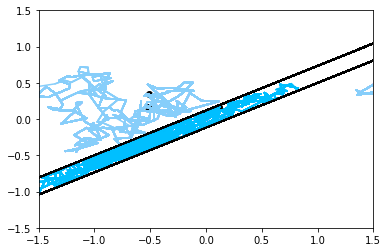

In [38]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []

for i in range(N):
    print(i)
    for j in range(numofmol):

        new_y = traj[1,:i,j]
        new_x = traj[0,:i,j]

        if i == 0:
            ax.scatter(traj[0,0,j],traj[1,0,j],color='black')
        #elif i==N-1:
            #ax.scatter(traj[0,i,j],traj[1,i,j])
        if where[j] == 1:
            ax.plot(new_x,new_y,'deepskyblue')
        else:
            ax.plot(new_x,new_y,'lightskyblue')
        ax.plot(line1[:,0],line1[:,1],color='black')
        ax.plot(line2[:,0],line2[:,1],color='black')
        plt.xlim((-1.5, 1.5))   # set the xlim to left, right
        plt.ylim((-1.5, 1.5)) 


    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

In [39]:
import imageio.v2 as imageio
with imageio.get_writer('10mol_45deg.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [40]:
origtraj = np.zeros((N,2,numofmol))

for i in range(numofmol):
    origtraj[:,0,i] = traj[0,:,i] - initialrot[i,0]
    origtraj[:,1,i] = traj[1,:,i] - initialrot[i,1]

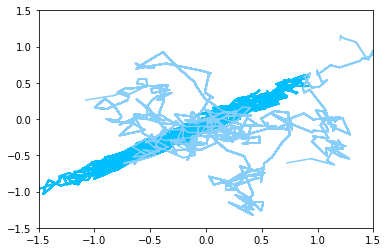

In [41]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
filenames = []

for i in range(N):
    print(i)
    for j in range(numofmol):

        new_y = origtraj[:i,1,j]
        new_x = origtraj[:i,0,j]


        #ax.plot(new_x,new_y,'b')
        if where[j] == 1:
            ax.plot(new_x,new_y,'deepskyblue')
        else:
            ax.plot(new_x,new_y,'lightskyblue')


        plt.xlim((-1.5, 1.5))   # set the xlim to left, right
        plt.ylim((-1.5, 1.5)) 


    plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

In [42]:
import imageio.v2 as imageio
with imageio.get_writer('10mol_45degstick_origin.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Trying 3D

In [43]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian_singlestep(x0, n, dt, delta, radius, theta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    coordhold = np.copy(x0)
    coordfinal = np.zeros((3,n))
    #coordfinal = []

    #c, s = np.cos(theta), np.sin(theta)
    #rot = np.array(((c, -s), (s, c)))


    if x0[0] < -radius:
        print('less than -')
        for i in range(n):
            #print(i)
            r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
            if (r[0] + coordhold[0]) < -radius:
                coordhold += r
                coordfinal[:,i] = coordhold
            else:
                while (r[0] + coordhold[0]) > -radius:
                    r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                coordhold += r
                coordfinal[:,i] = coordhold
    elif x0[0] > radius:
        print('greater than +')
        for i in range(n):
            #print(i)
            r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
            if (r[0] + coordhold[0]) > radius:
                coordhold += r
                coordfinal[:,i] = coordhold
            else:
                while (r[0] + coordhold[0]) < radius:
                    r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                coordhold += r
                coordfinal[:,i] = coordhold
    else:
        print('inside')
        for i in range(n):
            #print(i)
            r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
            if (r[0] + coordhold[0]) > -radius and (r[0] + coordhold[0]) < radius and (r[1] + coordhold[1]) > -radius and (r[1] + coordhold[1]) < radius:
                coordhold += r
                coordfinal[:,i] = coordhold
            else:
                while (r[0] + coordhold[0]) < -radius or (r[0] + coordhold[0]) > radius:
                    r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                coordhold += r
                coordfinal[:,i] = coordhold

    coordfinal = np.squeeze(np.array(coordfinal))

    # Add the initial condition.
    #coordfinal += np.expand_dims(x0, axis=-1)

    #coordfinal = rot @ coordfinal

    return coordfinal

# NEW 3D

In [44]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian_singlestep(x0, n, dt, delta, radius, theta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    coordhold = np.copy(x0)
    coordfinal = np.zeros((3,n))
    #coordfinal = []

    #c, s = np.cos(theta), np.sin(theta)
    #rot = np.array(((c, -s), (s, c)))

    #lengthinit = np.sqrt(x[0]**2 + x[1]**2)

    if x0[0] < -radius:
        where=0
        print('less than -')
        for i in range(n):
            if i == 0:
                coordfinal[:,i] = x0
            #print(i)
            else:
                r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) < -radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) > -radius:
                        r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold
    elif x0[0] > radius:
        where=0
        print('greater than +')
        for i in range(n):
            if i == 0:
                coordfinal[:,i] = x0
            #print(i)
            else:
                r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) > radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) < radius:
                        r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold
    else:
        where = 1
        print('inside')
        for i in range(n):
            if i == 0:
                coordfinal[:,i] = x0
            #print(i)
            else:
                r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                if (r[0] + coordhold[0]) > -radius and (r[0] + coordhold[0]) < radius:
                    coordhold += r
                    coordfinal[:,i] = coordhold
                else:
                    while (r[0] + coordhold[0]) < -radius or (r[0] + coordhold[0]) > radius:
                        r = norm.rvs(size=(3,),scale=delta*sqrt(dt))
                    coordhold += r
                    coordfinal[:,i] = coordhold

    coordfinal = np.squeeze(np.array(coordfinal))
    # Add the initial condition.
    #coordfinal += np.expand_dims(x0, axis=-1)

    #coordfinal = coordfinal @ rot

    return coordfinal,where

In [45]:
import random
import numpy as np
import numpy
numofmol = 5
N = 40

radius = 0.5
theta = 0
traj = np.zeros((3,N,numofmol))

delta = 0.25
# Total time.
T = 10.0

# Time step size
dt = T/N

#initial = numpy.random.uniform(low=-1.5, high=1.5, size=(numofmol,3))
initial = numpy.random.uniform(low=-0.1, high=0.1, size=(numofmol,3))

for i in range(numofmol):
    [traj[:,:,i],where] = brownian_singlestep(initial[i,:], N, dt, delta,radius,theta)

inside
inside
inside
inside
inside


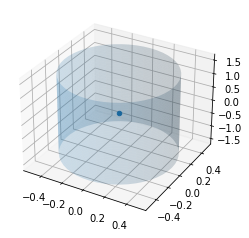

In [46]:

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(-height_z/2, height_z/2, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,radius,3)
ax.plot_surface(Xc, Yc, Zc, alpha=0.2)
ax.scatter3D(0,0,0,'b')

In [47]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(111)
filenames = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(N):
    print(i)
    for j in range(numofmol):

        new_y = traj[1,:i,j]
        new_x = traj[0,:i,j]
        new_z = traj[2,:i,j]

        #if i == 0:
        #    ax.plot(new_x,new_y,'go')
        #elif i==f.shape[1]-1:
        #    ax.plot(new_x,new_y,'ro')

        ax.plot3D(new_x,new_y,new_z,'b')
        #plt.axvline(x = -radius, color = 'black', label = 'axvline - full height')
        #plt.axvline(x = radius, color = 'black', label = 'axvline - full height')   
        #ax.plot(line1[:,0],line1[:,1],color='black')
        #ax.plot(line2[:,0],line2[:,1],color='black')
        ax.plot_surface(Xc, Yc, Zc, alpha=0.2)
        
        ax.set_zlim(-1.5,1.5) 
        plt.xlim((-1.5, 1.5))   # set the xlim to left, right
        plt.ylim((-1.5, 1.5)) 



    #plt.savefig(f'test_{i}.png')
    filenames.append(f'test_{i}.png')
    #ax.clear()
    #display(fig)
    clear_output(wait=True)

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
brownian_singlestep(x0, n, dt, delta, radius, theta, out=None)

In [ ]:
f = brownian(x[:,0], N, dt, delta, out=x[:,1:])


In [ ]:
import random
>>> random.uniform(1.5, 1.9)

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


plt.ion()

figure, ax = plt.subplots(figsize=(10, 8))

# Mark the start and end points.
line1, = ax.plot(x[0,0],x[1,0], 'go')
line1, = ax.plot(x[0,-1], x[1,-1], 'ro')

for i in range(x.shape[1]):
	# creating new Y values

    new_y = x[1,i]
    new_x = x[0,i]
	# updating data values
    line1.set_xdata(new_x)
    line1.set_ydata(new_y)

	# drawing updated values
    figure.canvas.draw()

	# This will run the GUI event
	# loop until all UI events
	# currently waiting have been processed
    figure.canvas.flush_events()

    time.sleep(0.1)

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


#plt.ion()

figure, ax = plt.subplots(figsize=(10, 8))

ax.plot(x[0,0],x[1,0], 'go')
ax.plot(x[0,-1], x[1,-1], 'ro')

for i in range(x.shape[1]):
	# creating new Y values

    new_y = x[1,i]
    new_x = x[0,i]
	# updating data values
    ax.plot(new_x,new_y)

	# drawing updated values
    #figure.canvas.draw()
    #plt.pause(0.2)
	# This will run the GUI event
	# loop until all UI events
	# currently waiting have been processed
    #figure.canvas.flush_events()
    plt.show()
    #time.sleep(0.1)

In [ ]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.random.randn(1000)
plt.hist(X,bins=20)

In [ ]:
sigma=1
mu=0
probx = (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(X-mu)**2/(2*sigma**2))

In [ ]:
plt.bar(X,probx)

In [ ]:
np.sum(probx)/1000

In [ ]:
test = probx*X

In [ ]:
np.sum(test)

In [ ]:
np.sum(X)/1000